# Dropout Notebook


### **Prerequisites**
* Regularization

***What will we cover in this notebook?***

* Explain dropout in nn
* Implementation in PyTorch
-----
1. What is dropout and why do we need it? What was the idea behind it?
2. How is dropout similar to ensembling a large variety of neural network architectures?
3. Implementation in PyTorch on a basic neural network
4. Visualising the difference between the non-dropout and dropout implemented models

### 1. What was the idea behind Dropout?
   * explain why we need dropout? Which problem leads us to do dropout
   * show a dropout example on a basic neural network
   * explain dropout parameters
   * important aspects of dropout
    

**A brief introduction**

A common problem in machine learning is how to increase our model's performance on unseen data. We simply reduce the test error. To achieve this goal, we apply some regularization strategies. Regularization is defined as "any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error". We'll focus on dropout which is one of those strategies !

**What is the idea behind 'Dropout'?**

Before math, let's understand what we mean by saying dropout:
Let's assume that we do sport for a week and we play 

### 2. Similarity between dropout and ensembles methods
   * explain what the ensemble method is
   * list the similary between them
   * what makes dropout unique

![ensemble.png](attachment:ensemble.png)

### 3. Implementation in PyTorch on a basic neural network 

We'll do an implementation with MNIST dataset which is very popular and contains 77.000 handwritten digits. Every data points has 28x28 grayscale image and a label (the digit) from 0 to 9.
We'll cover a non-dropout and dropout models together. Let's do  it!

* Load and prepare the dataset


In [1]:
import torch
from torchvision import datasets, transforms

crop_size = 22

traintransforms = []
traintransforms.append(transforms.CenterCrop(crop_size))
traintransforms.append(transforms.ToTensor())
traintransforms = transforms.Compose(traintransforms)

# GET THE TRAINING DATASET
train_data = datasets.MNIST(root='MNIST-data',                        # where is the data (going to be) stored
                            transform=traintransforms,          # transform the data from a PIL image to a tensor
                            train=True,                               # is this training data?
                            download=True                             # should i download it if it's not already here?
                           )

testtransforms = []
testtransforms.append(transforms.RandomCrop(crop_size))
testtransforms.append(transforms.ToTensor())
testtransforms = transforms.Compose(testtransforms)

# GET THE TEST DATASET
test_data = datasets.MNIST(root='MNIST-data',
                           transform=testtransforms,
                           train=False,
                          )

Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


* Print some examples:

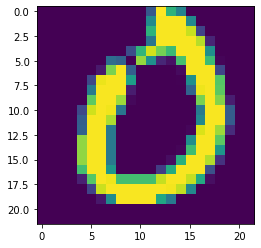

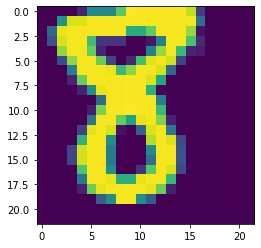

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# PRINT THEIR LENGTHS AND VISUALISE AN EXAMPLE
x = train_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()
x = test_data[np.random.randint(0, 300)][0]    # get the first example
plt.imshow(x[0].numpy())
plt.show()

* Now, we'll seperate our training dataset into training and validation sets.

In [3]:
# FURTHER SPLIT THE TRAINING INTO TRAINING AND VALIDATION
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])    # split into 50K training & 10K validation

* Pass datasets to Pytorch dataloader:

In [4]:
batch_size = 128

# MAKE TRAINING DATALOADER
train_loader = torch.utils.data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE VALIDATION DATALOADER
val_loader = torch.utils.data.DataLoader(
    val_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE TEST DATALOADER
test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle=True,
    batch_size=batch_size
)

* It's time to create dropout model !

In [31]:
import torch.nn.functional as F
import torch.nn as nn


class NeuralNetworkClass(torch.nn.Module):
    def __init__(self):
        super().__init__()    # initialise parent module
        self.layer1 = torch.nn.Linear(crop_size*crop_size, 225)
        self.layer2 = torch.nn.Linear(225, 100)
        self.layer3 = torch.nn.Linear(100, 10)
        
    def forward(self, x):
        x = x.view(-1, crop_size*crop_size)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

def get_n_params(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    n_params = sum([np.prod(p.size()) for p in model_parameters])
    return n_params




# This is our dropout implementation !
class NeuralNetworkClassDropout(torch.nn.Module):
    def __init__(self):
        super().__init__()    # initialise parent module
        self.layer1 = torch.nn.Linear(crop_size*crop_size, 225)
        self.layer2 = torch.nn.Linear(225, 100)
        self.layer3 = torch.nn.Linear(100, 10)
        self.dropout1 = nn.Dropout(p=0.2)           # first dropout parameter
        self.dropout2 = nn.Dropout(p=0.25)          # second dropout parameter

        
    def forward(self, x):
        x = x.view(-1, crop_size*crop_size)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.dropout1(x)    # apply first dropout after the first layer
        x = self.layer2(x)
        x = F.relu(x)
        x = self.dropout2(x)    # apply second dropout after the second layer
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

def get_n_params(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    n_params = sum([np.prod(p.size()) for p in model_parameters])
    return n_params


In [32]:
learning_rate = 0.0005
myNeuralNetwork = NeuralNetworkClass()
print('Number of parameters in non-dropout model:', get_n_params(myNeuralNetwork))
myNeuralNetworkDropout = NeuralNetworkClassDropout()
print('Number of parameters in dropout model:', get_n_params(myNeuralNetworkDropout))

# CREATE OUR OPTIMISER
optimiser_nn = torch.optim.Adam(              # what optimiser should we use?
    myNeuralNetwork.parameters(),          # what should it optimise?
    lr=learning_rate                       # using what learning rate?
)

# CREATE OUR OPTIMISER
optimiser_nnd = torch.optim.Adam(              # what optimiser should we use?
    myNeuralNetworkDropout.parameters(),          # what should it optimise?
    lr=learning_rate                       # using what learning rate?
)

# CREATE OUR CRITERION
criterion = torch.nn.CrossEntropyLoss()             # callable class that compares our predictions to our labels and returns our loss

# SET UP TRAINING VISUALISATION
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()                            # we will use this to show our models performance on a graph


Number of parameters in non-dropout model: 132735
Number of parameters in dropout model: 132735


* Training part:

In [33]:
# TRAINING LOOP
def train_nn(model, epochs):
    model.train()                                  # put the model into training mode (more on this later)
    for epoch in range(epochs):
        for idx, minibatch in enumerate(train_loader):
            inputs, labels = minibatch
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the loss
            optimiser_nn.zero_grad()                  # reset the gradients attribute of each of the model's params to zero
            loss.backward()                        # backward pass to compute and set all of the model param's gradients
            optimiser_nn.step()                       # update the model's parameters
            writer.add_scalar('Loss/Train', loss, epoch*len(train_loader) + idx)    # write loss to a graph
        print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss)

# TRAINING LOOP
def train_nnd(model, epochs):
    model.train()                                  # put the model into training mode (more on this later)
    for epoch in range(epochs):
        for idx, minibatch in enumerate(train_loader):
            inputs, labels = minibatch
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the loss
            optimiser_nnd.zero_grad()                  # reset the gradients attribute of each of the model's params to zero
            loss.backward()                        # backward pass to compute and set all of the model param's gradients
            optimiser_nnd.step()                       # update the model's parameters
            writer.add_scalar('Loss/Train', loss, epoch*len(train_loader) + idx)    # write loss to a graph
        print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss)           
            

train_nn(myNeuralNetwork, 5)           
train_nnd(myNeuralNetworkDropout, 5)

Epoch: 0 	Batch: 390 	Loss: tensor(1.5484, grad_fn=<NllLossBackward>)
Epoch: 1 	Batch: 390 	Loss: tensor(1.5489, grad_fn=<NllLossBackward>)
Epoch: 2 	Batch: 390 	Loss: tensor(1.5075, grad_fn=<NllLossBackward>)
Epoch: 3 	Batch: 390 	Loss: tensor(1.5684, grad_fn=<NllLossBackward>)
Epoch: 4 	Batch: 390 	Loss: tensor(1.5009, grad_fn=<NllLossBackward>)
Epoch: 0 	Batch: 390 	Loss: tensor(1.6596, grad_fn=<NllLossBackward>)
Epoch: 1 	Batch: 390 	Loss: tensor(1.5413, grad_fn=<NllLossBackward>)
Epoch: 2 	Batch: 390 	Loss: tensor(1.5627, grad_fn=<NllLossBackward>)
Epoch: 3 	Batch: 390 	Loss: tensor(1.4991, grad_fn=<NllLossBackward>)
Epoch: 4 	Batch: 390 	Loss: tensor(1.5011, grad_fn=<NllLossBackward>)


* Evaluate our two models:

In [34]:
def calc_accuracy(model, dataloader):
    num_correct = 0
    num_examples = len(dataloader.dataset)                       # test DATA not test LOADER
    for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
        predictions = model(inputs)
        predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies
        predictions = predictions[1]                    # torch.max returns (values, indices)
        num_correct += int(sum(predictions == labels))
    percent_correct = num_correct / num_examples * 100
    return percent_correct

print("Non-Dropout Model's Evaluation:")
print('Train Accuracy:', calc_accuracy(myNeuralNetwork, train_loader))
print('Validation Accuracy:', calc_accuracy(myNeuralNetwork, val_loader))
print('Test Accuracy:', calc_accuracy(myNeuralNetwork, test_loader))

print("\nDropout Model's Evaluation:")
print('Train Accuracy:', calc_accuracy(myNeuralNetworkDropout, train_loader))
print('Validation Accuracy:', calc_accuracy(myNeuralNetworkDropout, val_loader))
print('Test Accuracy:', calc_accuracy(myNeuralNetworkDropout, test_loader))


Non-Dropout Model's Evaluation:
Train Accuracy: 96.124
Validation Accuracy: 95.14
Test Accuracy: 50.339999999999996

Dropout Model's Evaluation:
Train Accuracy: 95.02199999999999
Validation Accuracy: 94.43
Test Accuracy: 51.519999999999996


### 4. Visualizing the difference between a non-dropout and dropout implemented nn
* Copy the nn repo model performance metrics etc
* Explain the metrics used
* Evaluate the dropout model
* Compare training curves
* Compare model performance metrics

As we see above, our model overfits. It performs very good on training data, but it is poor on test data. So that means, we have a overfitting problem.
Let's try dropout and see if we can overcome this issue:

### 5. Summary
***List the key points like:***

* dropout definition in a sentence
* ensemble method
* how to overcome overfitting after applying dropout, show model performance metrics

### 6. What to do next?
* Challenge about dropout, search on net, 3 example